<a href="https://colab.research.google.com/github/queenakki/AI-ML/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Convolution experiment-5**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pit
from itertools import product

Import **drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


set the **param**

In [4]:
pit.rc('figure',autolayout=True)
pit.rc('image',cmap='magma')

**kernel**

In [5]:
kernel=tf.constant([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

Image **loading**

In [6]:
image=tf.io.read_file('/content/drive/MyDrive/butterfly.jpg')
image=tf.io.decode_jpeg(image,channels=1)
image=tf.image.resize(image,size=(300,300))

plot the **image**

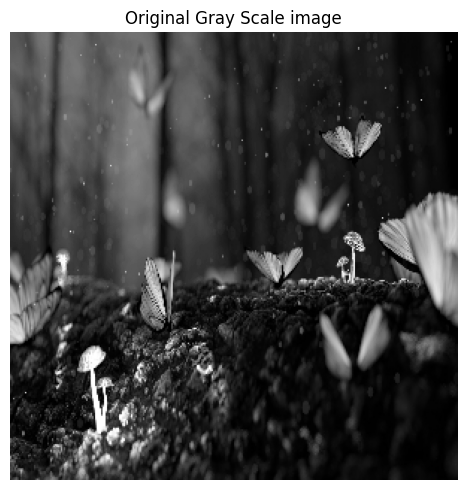

In [7]:
img=tf.squeeze(image).numpy()
pit.figure(figsize=(5,5))
pit.imshow(img,cmap='gray')
pit.axis('off')
pit.title('Original Gray Scale image')
pit.show()

**Reformat**

In [8]:
image=tf.image.convert_image_dtype(image,dtype=tf.float32)
image=tf.expand_dims(image,axis=0)
kernel=tf.reshape(kernel,(*kernel.shape,1,1))
kernel=tf.cast(kernel,dtype=tf.float32)

Convolution **layer**

In [9]:
conv_fn=tf.nn.conv2d
image_filter=conv_fn(input=image,
                     filters=kernel,
                     strides=1,# or (1,1)
                     padding='SAME',)
pit.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

plot convolution **layer**

Text(0.5, 1.0, 'Convolution')

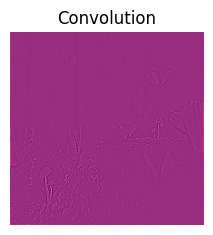

In [10]:
pit.subplot(1,3,1)
pit.imshow(tf.squeeze(image_filter))
pit.axis('off')
pit.title('Convolution')

activation layer

In [11]:
relu_fn=tf.nn.relu

image **detection**

Text(0.5, 1.0, 'Activation')

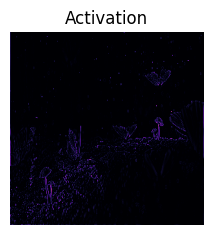

In [12]:
image_detect=relu_fn(image_filter)
pit.subplot(1,3,2)
pit.imshow(tf.squeeze(image_detect))
pit.axis('off')
pit.title('Activation')

Pooling **layer**

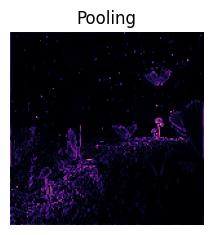

In [13]:
pool=tf.nn.pool
image_condense=pool(input=image_detect,
                    window_shape=(2,2),
                    pooling_type='MAX',
                    strides=(2,2),
                    padding='SAME',
                    )
pit.subplot(1,3,3)
pit.imshow(tf.squeeze(image_condense))
pit.axis('off')
pit.title('Pooling')
pit.show()


**CNN**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


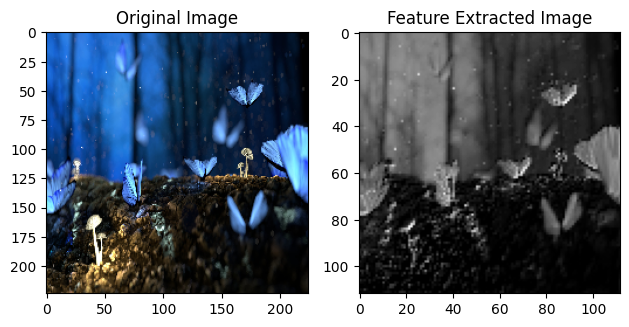

In [15]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
image_path = '/content/drive/MyDrive/butterfly.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
])
features = model.predict(image_array)

# Display the original and feature-extracted images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(features[0, :, :, 0], cmap='gray')  # Display the first feature map
plt.title('Feature Extracted Image')

plt.show()